# Run a streamlit app from a Google Colab Notebook

### Get the app code:
We need the following files from the repository in the Colab file system.
- `app.py`
- `consts.py`
- `general_utils.py`
- `scrape.py`
- `.streamlit/config.toml`

You can access the file system by clicking on the directory symbol on the left-hand side.

**It should look like this after it runs:**

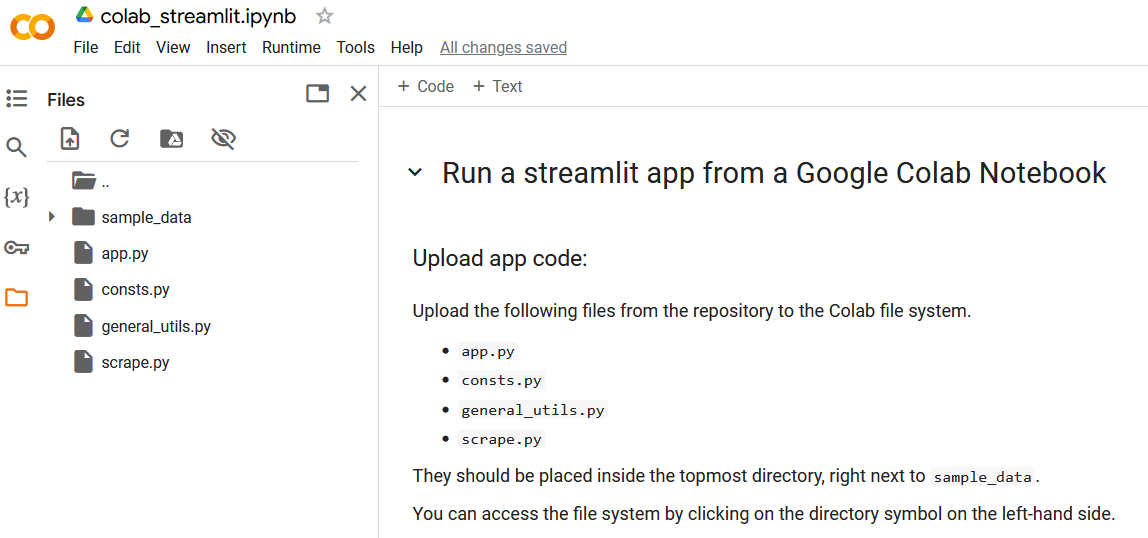

### Run the cell below to get the app code from github

In [ ]:
!mkdir /content/.streamlit
!wget https://raw.githubusercontent.com/camelDetective/rrscrape/main/rrscrape/.streamlit/config.toml -q -P /content/.streamlit
!wget https://raw.githubusercontent.com/camelDetective/rrscrape/main/rrscrape/consts.py -q -P/content/
!wget https://raw.githubusercontent.com/camelDetective/rrscrape/main/rrscrape/general_utils.py -q -P/content/
!wget https://raw.githubusercontent.com/camelDetective/rrscrape/main/rrscrape/scrape.py -q -P/content/
!wget https://raw.githubusercontent.com/camelDetective/rrscrape/main/rrscrape/app.py -q -P/content/

### Run the cells below to to run the app on the Colab instance (click play button on top left or `ctrl+enter`)

In [ ]:
!pip install -q streamlit openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.3/328.3 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.3 MB/s eta 0:00:00


## Install localtunnel on the Colab instance

In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.228s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


## Run streamlit in background

In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

### Get exposed IP address

In [ ]:
from pathlib import Path
import time

if not Path('logs.txt').exists() or len(Path('logs.txt').read_text()) < 30:
  print('Waiting for 5 seconds for streamlit to finish loading')
  time.sleep(5)
with open('logs.txt', 'r') as f:
  for line in f:
    if 'External' in line:
      external_ip = line.split('//')[1].split(':')[0]
      break
print(f'Your temporary app IP: is: {external_ip}\nCopy it and paste it in the "Tunnel Password" field in website that will be linked below.')

Your temporary app IP: is: 34.86.250.105
Copy it and paste it in the "Tunnel Password" field in website that will be linked below.


You can also find the external IP address in the `logs.txt` file that was created.

## Expose the port 8501
Run this cell and click the link generated below. Once there, enter the external IP you copied from the output of the cell above.

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 1.72s
your url is: https://some-bags-smell.loca.lt
